In [18]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

In [19]:
# params
N = 1000
F = N
size=100

In [20]:
def gamma_wrapper(cor: float) -> BaseGenerator:
    return ga.Generator(F, size, cor, (2,4))

def mn_wrapper(cor: float) -> BaseGenerator:
    return mn.Generator(F, size, cor, (4,6), (1,1))

In [21]:
def calc(wrapper, cor: float):
    generator = wrapper(cor)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

calc(gamma_wrapper, 0.5)

(0.47817600711522246, 601843.2124339746)

In [22]:
from tqdm import tqdm

repeats = 100
cor_rng = np.arange(0, 1.01, 0.05)

In [23]:
%%time
ga_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_ga, l_ga= calc(gamma_wrapper, cor)

        ga_res.append((cor, r_ga, l_ga))

CPU times: user 15min 16s, sys: 5min 28s, total: 20min 44s
Wall time: 9min 2s


In [24]:
%%time
repeats = 20
mn_res = []

for cor in cor_rng:
    for _ in range(repeats):
        r_mn, l_mn = calc(mn_wrapper, cor)

        mn_res.append((cor, r_mn, l_mn))

CPU times: user 23min 27s, sys: 4min 1s, total: 27min 28s
Wall time: 13min 57s


In [25]:
df_ga = pd.DataFrame(ga_res, columns=['expected', 'actual', 'load'])
df_mn = pd.DataFrame(mn_res, columns=['expected', 'actual', 'load'])

In [26]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})
mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['mean', 'count', 'std']})

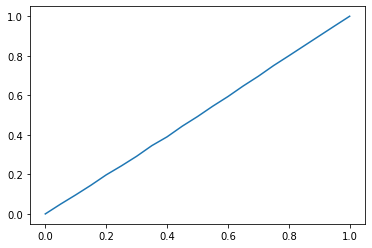

In [27]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

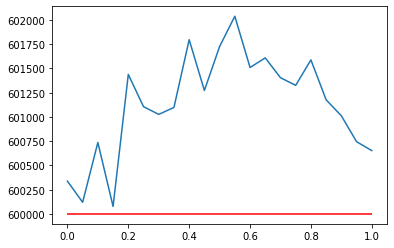

In [28]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, grped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

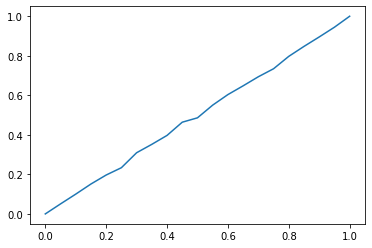

In [29]:
plt.plot(mnped.index, mnped.actual['mean'])
plt.show()

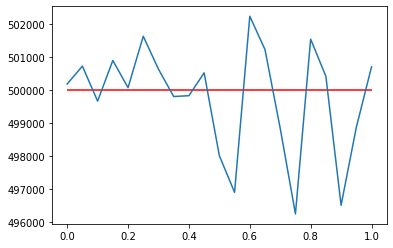

In [30]:
line = mn_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped.index, mnped.load['mean'])
plt.hlines(line, 0, 1, colors="red")
plt.show()

In [31]:
grped

actual                           load                   
              mean count       std           mean count          std
expected                                                            
0.00      0.000256   100  0.000149  600337.766259   100  3904.552597
0.05      0.049643   100  0.007072  600120.048817   100  4181.382124
0.10      0.096542   100  0.013248  600736.408189   100  4110.442546
0.15      0.145425   100  0.018080  600077.062850   100  3863.301969
0.20      0.197617   100  0.022642  601437.917244   100  3488.759103
0.25      0.243230   100  0.024053  601106.056638   100  4185.650772
0.30      0.291662   100  0.028875  601026.247838   100  3846.396647
0.35      0.345499   100  0.027846  601097.789202   100  3941.116528
0.40      0.389960   100  0.033244  601796.322025   100  3898.452444
0.45      0.443994   100  0.031085  601272.827945   100  3926.391423
0.50      0.492467   100  0.029186  601725.780963   100  4048.916817
0.55      0.544810   100  0.031291  602038.187303   100  4180.033872
0.60      0.593664   100  0.027443  601509.899285   100  3651.336970
0.65      0.646996   100  0.022887  601608.644835   100  3377.127643
0.70      0.696462   100  0.021873  601404.535257   100  3658.772055
0.75      0.750333   100  0.018762  601325.486441   100  4230.679253
0.80      0.799705   100  0.014898  601588.172322   100  4321.622031
0.85      0.849971   100  0.009193  601176.544502   100  3977.147885
0.90      0.900168   100  0.005163  601011.806432   100  3565.113533
0.95      0.950305   100  0.002030  600744.767020   100  3956.397912
1.00      0.999893   100  0.000147  600652.825599   100  4388.839294

In [32]:
mnped

actual                               load                    
              mean count           std           mean count           std
expected                                                                 
0.00      0.000205    20  1.416568e-04  500190.055962    20   1380.771481
0.05      0.050819    20  6.979701e-03  500731.243399    20   2280.601989
0.10      0.100245    20  1.160799e-02  499672.941540    20   3440.806508
0.15      0.151487    20  1.867686e-02  500902.185429    20   4339.967815
0.20      0.196903    20  2.494606e-02  500079.145575    20   5180.231419
0.25      0.233915    20  1.857359e-02  501634.823533    20   6903.730226
0.30      0.309627    20  2.929429e-02  500639.277745    20   6964.661312
0.35      0.352117    20  3.641863e-02  499811.624917    20   5985.298446
0.40      0.397273    20  3.610449e-02  499836.477449    20   5786.832537
0.45      0.464131    20  3.230073e-02  500528.128305    20   7842.509578
0.50      0.486231    20  4.185341e-02  498020.482571    20   7432.745844
0.55      0.550483    20  3.745573e-02  496911.887604    20  10153.435619
0.60      0.603804    20  2.887040e-02  502240.519539    20   8389.612637
0.65      0.648065    20  3.640856e-02  501230.648774    20   7471.388709
0.70      0.694005    20  3.678289e-02  498846.919350    20  11501.105116
0.75      0.734470    20  3.632205e-02  496259.019843    20   9408.422496
0.80      0.797155    20  2.227184e-02  501547.459585    20   6242.753840
0.85      0.847509    20  1.720082e-02  500423.395433    20   9580.150938
0.90      0.895304    20  9.364207e-03  496520.168169    20  10912.826917
0.95      0.944556    20  1.118144e-02  498879.095574    20  11408.454609
1.00      1.000000    20  4.434061e-14  500708.876726    20  10639.528860